# Lab 05 - Bài tập

**Bài 01:** Một bài thi trắc nghiệm gồm 10 câu hỏi, mỗi câu có 4 phương án trả lời trong đó chỉ có một phương án đúng. Bạn hãy: 

a. Một sinh viên không học bài làm bài bằng cách chọn ngẫu nhiên một phương án cho mỗi câu hỏi. Bạn hãy dùng hàm random để in ra số câu đúng của bạn sinh viên trong 10 lần kiểm tra.

b. Giả sử mỗi câu đúng được 4 điểm, mỗi câu sai bị trừ 2 điểm. Tính xác suất để sinh viên này được 4 điểm

c. Gọi X là số câu trả lời đúng. Tính E(X) và Var(X)

In [5]:
import random
from scipy.stats import binom

# a, Số câu hỏi và xác suất lựa chọn đáp án đúng ở một câu trả lời
n, p = 10, 0.25
binom.rvs(n, p)
bi_sam_10 = binom.rvs(n, p, size=10)
bi_sam_10

array([1, 1, 5, 3, 2, 2, 4, 4, 1, 4], dtype=int64)

In [11]:
# b, Giả sử mỗi câu đúng được 4 điểm, mỗi câu sai bị trừ 2 điểm. Tính xác suất để sinh viên này được 4 điểm
# cần trả lời 4 câu đúng để có 4đ
xac_xuat_4_point = binom.pmf(4, 10 , 0.25)
print(xac_xuat_4_point)

0.14599800109863273


In [13]:
# c, Gọi X là số câu trả lời đúng. Tính E(X) và Var(X)
n, p = 10, 1/4
expected_value = binom.mean(n, p)
variance = binom.var(n, p)

print(f"Kỳ vọng E(X): {expected_value}")
print(f"Phương sai Var(X): {variance}")

Kỳ vọng E(X): 2.5
Phương sai Var(X): 1.875


**Bài 02:** Một trung tâm bưu điện nhận được 3 cuộc gọi điện thoại mỗi phút. Tính xác suất để trung tâm nhận được 1 cuộc gọi, 2 cuộc gọi, 3 cuộc gọi trong vòng một phút biết số cuộc gọi trong một phút có phân phối Poisson.

In [17]:
from scipy.stats import poisson

lambda_ = 3  # Tỷ lệ trung bình
prob_1 = poisson.pmf(1, lambda_)
prob_2 = poisson.pmf(2, lambda_)
prob_3 = poisson.pmf(3, lambda_)

print(f"Xác suất nhận được 1 cuộc gọi: {prob_1:.5f}")
print(f"Xác suất nhận được 2 cuộc gọi: {prob_2:.5f}")
print(f"Xác suất nhận được 3 cuộc gọi: {prob_3:.5f}")


Xác suất nhận được 1 cuộc gọi: 0.14936
Xác suất nhận được 2 cuộc gọi: 0.22404
Xác suất nhận được 3 cuộc gọi: 0.22404


**Bài 03:** Trọng lượng (đơn vị gam) của một loại trái cây có phân phối chuẩn với µ = 500 (gam) gam và $σ^2 = 16 (gam^2)$. Trái cây thu hoạch được phân loại theo trọng lượng như sau:

Loại 1: trên 505 gam

Loại 2: từ 495 – 505 gam

Loại 3: dười 495 gam

a. Hãy tính tỷ lệ của mỗi loại.
b. Bạn hãy mô phỏng lấy mẫu  20 trái cây trên. Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu
c. Bạn hãy mô phỏng lấy 100 trái cây trên. Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu
d. Từ hai cách lấy mẫu ở câu b, c bạn có nhận xét gì không?

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Thông số phân phối chuẩn
mu = 500
sigma = 4

# a. Tính tỷ lệ mỗi loại
p_loai1 = 1 - norm.cdf(505, mu, sigma)
p_loai2 = norm.cdf(505, mu, sigma) - norm.cdf(495, mu, sigma)
p_loai3 = norm.cdf(495, mu, sigma)

print(f"Tỷ lệ Loại 1 (>505g): {p_loai1:.5f}")
print(f"Tỷ lệ Loại 2 (495-505g): {p_loai2:.5f}")
print(f"Tỷ lệ Loại 3 (<495g): {p_loai3:.5f}")

Tỷ lệ Loại 1 (>505g): 0.10565
Tỷ lệ Loại 2 (495-505g): 0.78870
Tỷ lệ Loại 3 (<495g): 0.10565


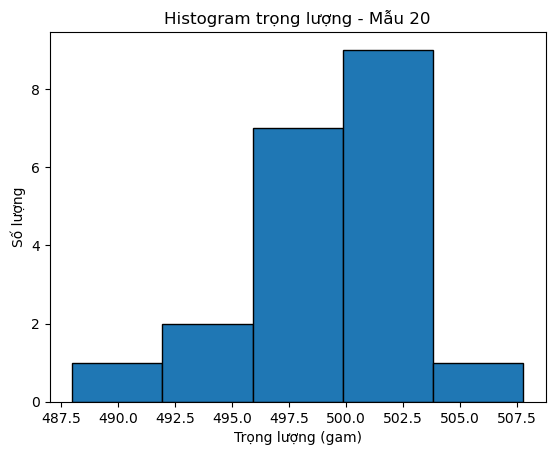

In [23]:
# b. Mô phỏng mẫu 20 trái cây
sample_20 = np.random.normal(mu, sigma, 20)
mean_20 = np.mean(sample_20)
std_20 = np.std(sample_20, ddof=1)

plt.hist(sample_20, bins=5, edgecolor='black')
plt.title('Histogram trọng lượng - Mẫu 20')
plt.xlabel('Trọng lượng (gam)')
plt.ylabel('Số lượng')
plt.show()

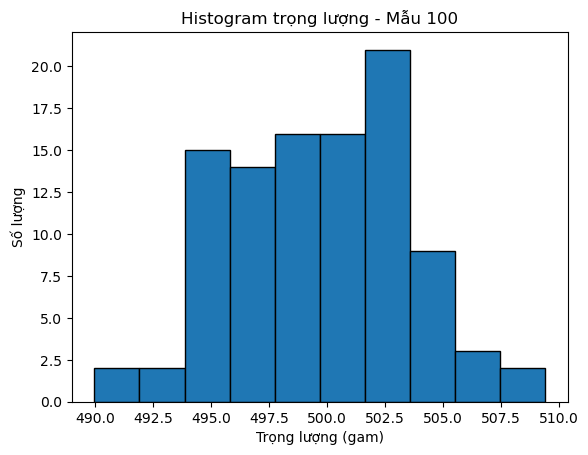

Mẫu 100 - Trung bình: 499.77, Độ lệch chuẩn: 3.80


In [25]:
# c. Mô phỏng mẫu 100 trái cây
sample_100 = np.random.normal(mu, sigma, 100)
mean_100 = np.mean(sample_100)
std_100 = np.std(sample_100, ddof=1)

plt.hist(sample_100, bins=10, edgecolor='black')
plt.title('Histogram trọng lượng - Mẫu 100')
plt.xlabel('Trọng lượng (gam)')
plt.ylabel('Số lượng')
plt.show()

print(f"Mẫu 100 - Trung bình: {mean_100:.2f}, Độ lệch chuẩn: {std_100:.2f}")

#Mẫu nhỏ (20 mẫu):

#Trung bình và độ lệch chuẩn có thể dao động nhiều so với giá trị lý thuyết.
#Histogram có thể không đều do số lượng mẫu ít.
#Mẫu lớn (100 mẫu):

#Trung bình và độ lệch chuẩn gần hơn với giá trị lý thuyết.
#Histogram mượt hơn, phản ánh rõ hơn hình dạng phân phối chuẩn.

**Bài 04:** Mô phỏng tung một con xúc sắc cân đối đồng chất 5000 lần. Dựa vào giá trị mô phỏng, bạn hãy tìm các giá trị xác suất dưới đây:

a. Xác suất để  số chấm xuất hiện là 4

b. Xác suất để số chấm xuất hiện lớn hơn hoặc bằng 4

c. Giả sử biết số chấm xuất hiện lớn hơn hoặc bằng 4. Hãy tìm xác suất để mặt 6 chấm xuất hiện.

In [27]:
import numpy as np

# Mô phỏng tung xúc xắc 5000 lần
np.random.seed(0)  # Để kết quả tái hiện được
rolls = np.random.randint(1, 7, size=5000)

# a. Xác suất số chấm xuất hiện là 4
p_4 = np.sum(rolls == 4) / len(rolls)

# b. Xác suất số chấm lớn hơn hoặc bằng 4
p_ge_4 = np.sum(rolls >= 4) / len(rolls)

# c. Xác suất xuất hiện 6 chấm, biết rằng số chấm >= 4
rolls_ge_4 = rolls[rolls >= 4]
p_6_given_ge_4 = np.sum(rolls_ge_4 == 6) / len(rolls_ge_4)

# In kết quả
print(f"a. Xác suất số chấm là 4: {p_4:.4f}")
print(f"b. Xác suất số chấm >= 4: {p_ge_4:.4f}")
print(f"c. Xác suất ra 6, biết số chấm >= 4: {p_6_given_ge_4:.4f}")


a. Xác suất số chấm là 4: 0.1734
b. Xác suất số chấm >= 4: 0.5052
c. Xác suất ra 6, biết số chấm >= 4: 0.3361


**Bài 05:** Tạo 5000 số ngẫu nhiên có phân phối nhị thức với n=50, p=0.7 Bạn Hãy

a. Tìm các giá trị thống kê: min, max, Q1, Q2, Q3

b. Vẽ đồ thị boxplot

c. Vẽ các đồ thị: tần số, tần suất

Min: 21
Max: 46
Q1 (25%): 33.0
Q2 (Median - 50%): 35.0
Q3 (75%): 37.0


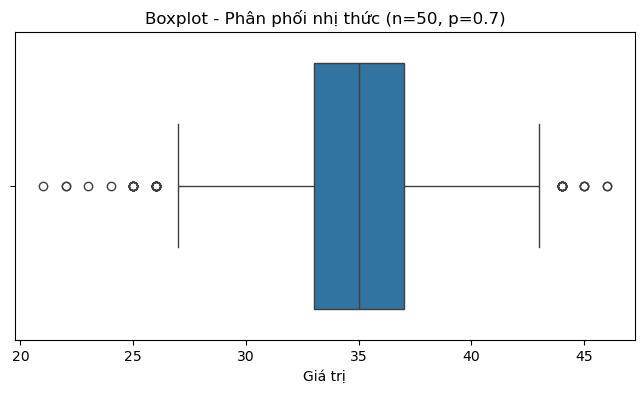

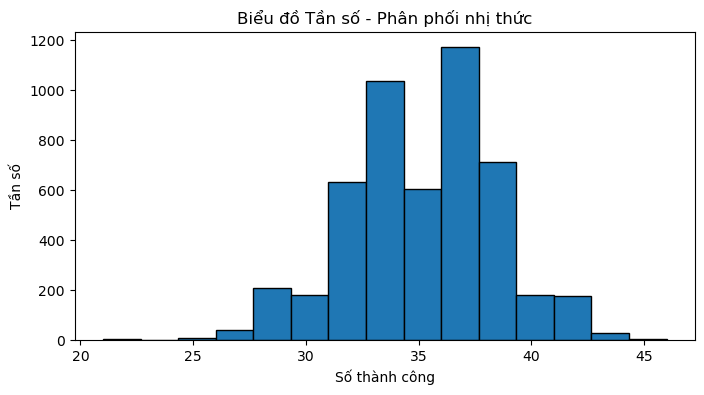

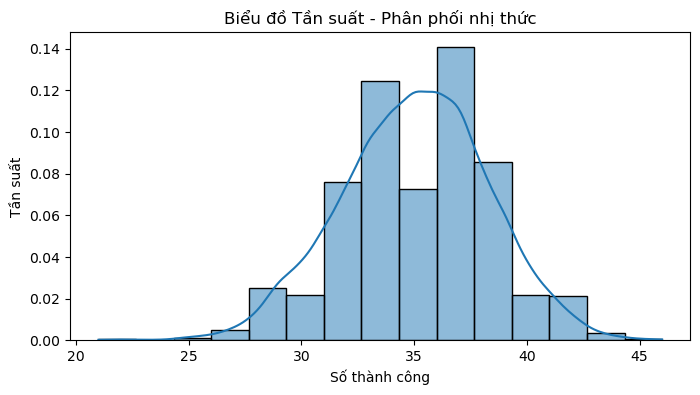

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mô phỏng 5000 số ngẫu nhiên với phân phối nhị thức
n = 50
p = 0.7
np.random.seed(0)  # Để tái hiện kết quả
data = np.random.binomial(n, p, 5000)

# a. Tính các giá trị thống kê
min_val = np.min(data)
max_val = np.max(data)
q1 = np.percentile(data, 25)
q2 = np.median(data)
q3 = np.percentile(data, 75)

print(f"Min: {min_val}")
print(f"Max: {max_val}")
print(f"Q1 (25%): {q1}")
print(f"Q2 (Median - 50%): {q2}")
print(f"Q3 (75%): {q3}")

# b. Vẽ đồ thị boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=data)
plt.title('Boxplot - Phân phối nhị thức (n=50, p=0.7)')
plt.xlabel('Giá trị')
plt.show()

# c1. Vẽ đồ thị tần số (histogram)
plt.figure(figsize=(8, 4))
plt.hist(data, bins=15, edgecolor='black')
plt.title('Biểu đồ Tần số - Phân phối nhị thức')
plt.xlabel('Số thành công')
plt.ylabel('Tần số')
plt.show()

# c2. Vẽ đồ thị tần suất (histogram với density)
plt.figure(figsize=(8, 4))
sns.histplot(data, bins=15, kde=True, stat="density", edgecolor='black')
plt.title('Biểu đồ Tần suất - Phân phối nhị thức')
plt.xlabel('Số thành công')
plt.ylabel('Tần suất')
plt.show()


**Bài 6**

Giả sử X là biến ngẫu nhiên rời rạc

a. Hãy cho biết ý nghĩa câu lệnh sau: `binom.pmf(4, 10, 0.6)`

b. Giả sử X có phân phối nhị thức `X ~ B(10, 0.6)`. Hãy tính các giá trị sau:  
$P(X \leq 5), P(X \le 5), P(X \ge 4), P(X = 5) $

c. Hãy cho biết ý nghĩa câu lệnh sau: `poisson.pmf(4, 3)`

d. Giả sử X có phân phối Poisson `X ~ P(3)`. Hãy tính các giá trị sau:  
$P(X \leq 5), P(X \le 5), P(X \ge 4), P(X = 5) $

In [31]:
# a, Tính xác suất để có đúng 4 lần thành công trong 10 lần thử, với xác suất thành công mỗi lần là 0.6.
# b, from scipy.stats import binom

# Xác suất P(X <= 5)
p_le_5 = binom.cdf(5, 10, 0.6)

# Xác suất P(X >= 4) = 1 - P(X <= 3)
p_ge_4 = 1 - binom.cdf(3, 10, 0.6)

# Xác suất P(X = 5)
p_eq_5 = binom.pmf(5, 10, 0.6)

print(f"P(X <= 5): {p_le_5:.4f}")
print(f"P(X >= 4): {p_ge_4:.4f}")
print(f"P(X = 5): {p_eq_5:.4f}")


P(X <= 5): 0.3669
P(X >= 4): 0.9452
P(X = 5): 0.2007


In [33]:
# c, Tính xác suất để xảy ra 4 sự kiện, với số lượng sự kiện trung bình là 3.
from scipy.stats import poisson
poisson.pmf(4, 3)


0.16803135574154085

In [35]:
from scipy.stats import poisson

# Xác suất P(X <= 5)
p_le_5_poisson = poisson.cdf(5, 3)

# Xác suất P(X >= 4) = 1 - P(X <= 3)
p_ge_4_poisson = 1 - poisson.cdf(3, 3)

# Xác suất P(X = 5)
p_eq_5_poisson = poisson.pmf(5, 3)

print(f"P(X <= 5): {p_le_5_poisson:.4f}")
print(f"P(X >= 4): {p_ge_4_poisson:.4f}")
print(f"P(X = 5): {p_eq_5_poisson:.4f}")


P(X <= 5): 0.9161
P(X >= 4): 0.3528
P(X = 5): 0.1008


**Bài 7**

a. Cho biết ý nghĩa của các câu lệnh sau:

- `norm.cdf(2)`

- `norm.cdf(2, 1, 1)`

- `norm.cdf(2, 1, 2)`

b. Cho biết kết quả của câu lệnh sau: `norm.ppf(norm.cdf(2))`

c. Tính các giá trị sau và vẽ hình minh họa cho các giá trị tính được:

- `norm.ppf(0.975)`

- `norm.ppf(0.975, 1, 1)`

- `norm.ppf(0.975, 1, 2)`

d. Giả sử biến ngẫu nhiên X có phân phối chuẩn với kỳ vọng là 24 và phương sai là 16. Hãy tính các giá trị sau:

- $P(X \leq 20)$
- $P(X \ge 29.5)$
- $P(X = 23.8)$

In [ ]:
# a, 
 `norm.cdf(2)`
Tính xác suất để một biến ngẫu nhiên có phân phối chuẩn chuẩn hóa 
N(0,1) (kỳ vọng = 0, độ lệch chuẩn = 1) nhỏ hơn hoặc bằng 2.

b, trả về xác suất của giá trị nhỏ hơn hoặc bằng 2.


**Bài 8**

Một công ty sản xuất làm ra các chi tiết máy với độ dài các chi tiết có phân phối chuẩn với kỳ vọng là 3000 mm và độ lệch chuẩn là 3 mm. Yêu cầu cho các chi tiết máy này là phải có chiều dài từ 2993 mm đến 3007 mm. Tính tỷ lệ sản phẩm lỗi của công ty

In [37]:
from scipy.stats import norm

# Thông số phân phối
mu = 3000  # Kỳ vọng
sigma = 3  # Độ lệch chuẩn

# Giới hạn đạt yêu cầu
lower = 2993
upper = 3007

# Tính xác suất đạt yêu cầu
p_pass = norm.cdf(upper, mu, sigma) - norm.cdf(lower, mu, sigma)

# Tỷ lệ sản phẩm lỗi
p_fail = 1 - p_pass

print(f"Tỷ lệ sản phẩm đạt yêu cầu: {p_pass * 100:.2f}%")
print(f"Tỷ lệ sản phẩm lỗi: {p_fail * 100:.2f}%")


Tỷ lệ sản phẩm đạt yêu cầu: 98.04%
Tỷ lệ sản phẩm lỗi: 1.96%


**Bài 9**

Giả sử điểm thi TOEIC là một biến ngẫu nhiên có phân phối chuẩn với kỳ vọng là 500, độ lệch chuẩn là 8. Bạn hãy:

a. Mô phỏng bằng cách phát sinh ngẫu nhiên điểm thi TOIEC của một nhóm gồm 50 người.

b. Tính điểm trung bình và độ lệch chuẩn về điểm của nhóm.

c. Tìm miền giá trị, và miền phân vị (IQR) của nhóm

d. Cho biết tỷ lệ đạt trên 450 điểm của nhóm. 

e. Vẽ đồ thị histogram của nhóm và so sánh với đồ thị hàm mật độ của phân phối chuẩn với kỳ vọng là 500 và độ lệch chuẩn là 8.

f. Thay vì mô phỏng 50 người, hãy mô phỏng nhóm với 100 người thi. Bạn có nhận xét gì?

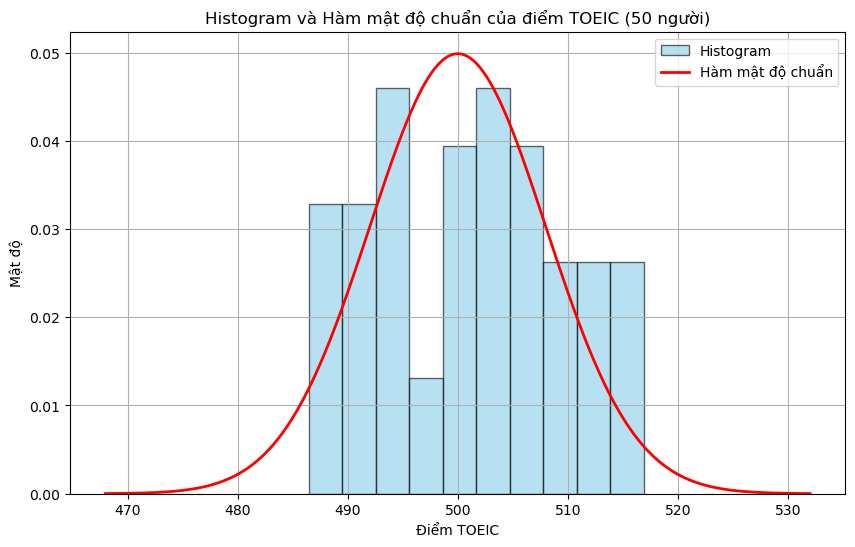

Điểm trung bình (50 người): 501.05
Độ lệch chuẩn (50 người): 8.37
Miền giá trị: [486.47, 516.90]
IQR: 13.48
Tỷ lệ đạt trên 450 điểm (50 người): 100.00%

Điểm trung bình (100 người): 498.91
Độ lệch chuẩn (100 người): 8.29


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Thông số phân phối
mu = 500
sigma = 8

# a. Mô phỏng điểm TOEIC cho 50 người
scores_50 = np.random.normal(mu, sigma, 50)

# b. Tính điểm trung bình và độ lệch chuẩn
mean_50 = np.mean(scores_50)
std_50 = np.std(scores_50, ddof=1)

# c. Tìm miền giá trị và miền phân vị (IQR)
min_score = np.min(scores_50)
max_score = np.max(scores_50)
q1 = np.percentile(scores_50, 25)
q3 = np.percentile(scores_50, 75)
iqr = q3 - q1

# d. Tỷ lệ đạt trên 450 điểm
rate_above_450 = np.mean(scores_50 > 450)

# e. Vẽ histogram và so sánh với hàm mật độ chuẩn
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf = norm.pdf(x, mu, sigma)

plt.figure(figsize=(10, 6))
plt.hist(scores_50, bins=10, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Histogram')
plt.plot(x, pdf, 'r-', lw=2, label='Hàm mật độ chuẩn')
plt.title('Histogram và Hàm mật độ chuẩn của điểm TOEIC (50 người)')
plt.xlabel('Điểm TOEIC')
plt.ylabel('Mật độ')
plt.legend()
plt.grid(True)
plt.show()

# f. Mô phỏng điểm TOEIC cho 100 người
scores_100 = np.random.normal(mu, sigma, 100)
mean_100 = np.mean(scores_100)
std_100 = np.std(scores_100, ddof=1)

print(f"Điểm trung bình (50 người): {mean_50:.2f}")
print(f"Độ lệch chuẩn (50 người): {std_50:.2f}")
print(f"Miền giá trị: [{min_score:.2f}, {max_score:.2f}]")
print(f"IQR: {iqr:.2f}")
print(f"Tỷ lệ đạt trên 450 điểm (50 người): {rate_above_450 * 100:.2f}%")
print(f"\nĐiểm trung bình (100 người): {mean_100:.2f}")
print(f"Độ lệch chuẩn (100 người): {std_100:.2f}")

**Bài 10**

Viết một chương trình để mô phỏng việc tung đồng xu và đánh giá phương sai của giá trị mô phỏng của biến ngẫu nhiên X (tung được mặt `Head`) đối với các số lần tung khác nhau. Giả sử  đồng xu phải cân bằng. 

Đối với mỗi N từ 10; 40; 90; 160; 250; 490; 640; 810; 1000, hãy ước tính giá trị của X bằng cách mô phỏng số lần tung đó. 

Bạn nên chạy mỗi mô phỏng 100 lần và sử dụng tập hợp các ước tính để đánh giá phương sai của ước tính x của bạn. Vẽ biểu đồ phương sai này so với N, bạn có nhận xét gì không?

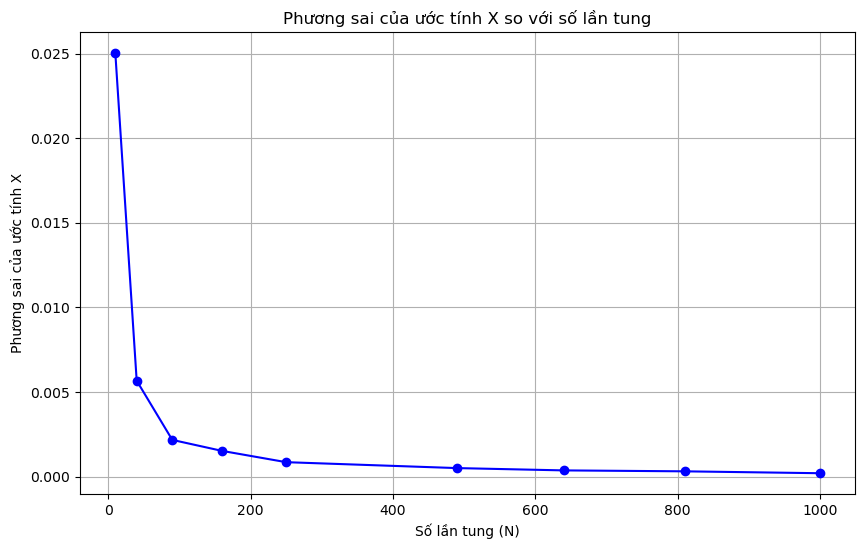

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Các số lần tung
N_values = [10, 40, 90, 160, 250, 490, 640, 810, 1000]
num_simulations = 100
variances = []

for N in N_values:
    estimates = []
    for _ in range(num_simulations):
        tosses = np.random.choice([0, 1], size=N, p=[0.5, 0.5])  # 0: Tail, 1: Head
        estimate = np.mean(tosses)
        estimates.append(estimate)
    var = np.var(estimates, ddof=1)
    variances.append(var)

# Vẽ biểu đồ phương sai so với số lần tung
plt.figure(figsize=(10, 6))
plt.plot(N_values, variances, marker='o', linestyle='-', color='b')
plt.title('Phương sai của ước tính X so với số lần tung')
plt.xlabel('Số lần tung (N)')
plt.ylabel('Phương sai của ước tính X')
plt.grid(True)
plt.show()


---